In [1]:
!pip install ipython


In [2]:
import librosa 
import librosa.display
import IPython.display as ipd
audio_file_path="C:/Users/Chait/OneDrive - MSFT/Desktop/music genre/78360-4-0-8.wav"
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

[0.29130495 0.29742447 0.11031738 ... 0.01118592 0.03090238 0.03426659]


22050

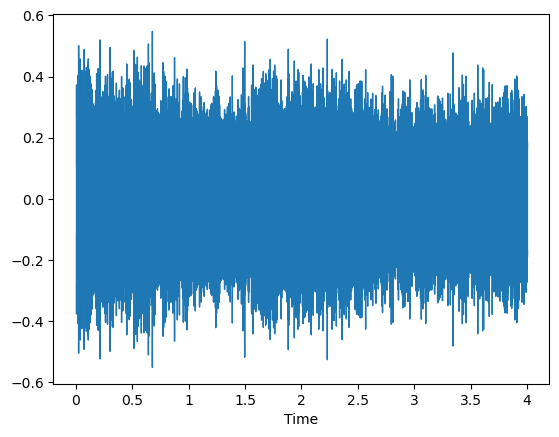

In [3]:
print(librosa_audio_data)
librosa.display.waveshow(librosa_audio_data)
wavfile=open(audio_file_path)
librosa_sample_rate

In [4]:
librosa_audio_data


array([0.29130495, 0.29742447, 0.11031738, ..., 0.01118592, 0.03090238,
       0.03426659], dtype=float32)

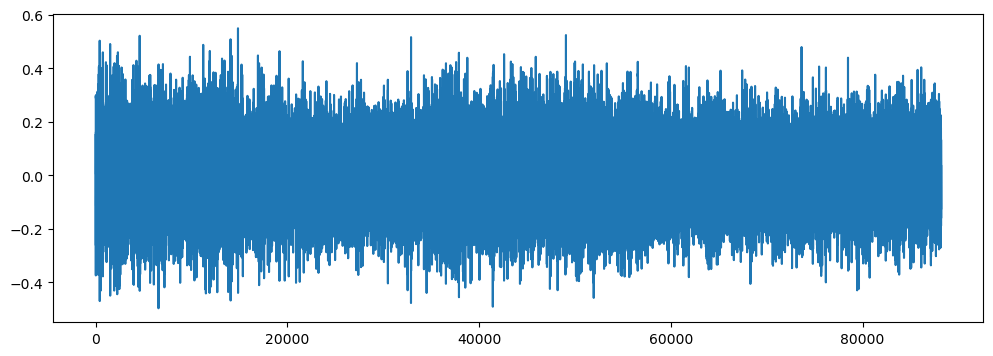

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.plot(librosa_audio_data)
#sound of a cutting machine
ipd.Audio(audio_file_path)
#one audio channel only so graph has one color

In [6]:
from scipy.io import wavfile as wav
wave_sample_rate,wave_audio=wav.read(audio_file_path)

In [7]:
wave_audio
wave_sample_rate

24000

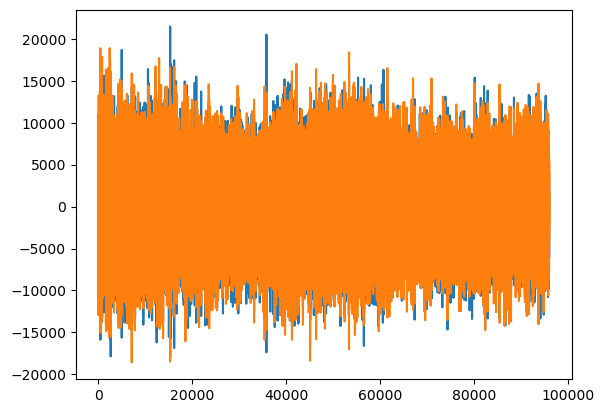

In [8]:
#with 2 audio channels comparing with librosa only one audio channel
plt.plot(wave_audio)

In [9]:
import pandas as pd

In [10]:
metadata=pd.read_csv("C:/Users/Chait/OneDrive - MSFT/Desktop/music genre/UrbanSound8K/UrbanSound8K/metadata/UrbanSound8K.csv")
metadata.head(7)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.5,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.5,84.500000,1,5,2,children_playing


In [11]:
# check balance of dataset
metadata['class'].value_counts()

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

In [12]:
#mel frequency cepstral coefficients

mfccs=librosa.feature.mfcc(y=librosa_audio_data ,sr=librosa_sample_rate,n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [13]:
mfccs


array([[-65.625175 , -34.23594  , -36.06873  , ..., -48.52376  ,
        -40.25388  , -57.525383 ],
       [  6.7650394,   9.363285 ,  16.123388 , ...,  26.31712  ,
         22.325771 ,  13.548237 ],
       [-74.187416 , -71.82761  , -69.20471  , ..., -73.6049   ,
        -70.12328  , -70.50076  ],
       ...,
       [  4.2259507,   0.7145934,   3.6259875, ...,   7.9279923,
          9.039354 ,   8.6696   ],
       [ -0.3489585,  -1.9243807,  -3.0708587, ...,  -4.617571 ,
         -6.610748 ,  -6.6778336],
       [  4.502926 ,   9.145206 ,  14.029869 , ...,  12.340019 ,
          7.9092207,   3.9009175]], dtype=float32)

In [14]:
import pandas as pd 
import librosa
import os

audio_dataset_path="C:/Users/Chait/OneDrive - MSFT/Desktop/music genre/UrbanSound8K/UrbanSound8K/audio"
metadata=pd.read_csv('C:/Users/Chait/OneDrive - MSFT/Desktop/music genre/UrbanSound8K/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [15]:
def features_extractor(file):
    audio,sample_rate=librosa.load(file_name,res_type='kaiser_fast')
    mfccs_features=librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
    mfccs_scaled_features=np.mean(mfccs_features.T,axis=0)

    return mfccs_scaled_features

In [16]:
!pip install resampy


In [17]:
import numpy as np
from tqdm import tqdm

extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name= os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3554it [02:54, 22.45it/s]C:\Users\Chait\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8324it [06:41, 26.79it/s]C:\Users\Chait\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
C:\Users\Chait\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [06:59, 20.83it/s]


In [18]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['features','class'])
extracted_features_df.head()

,features,class
0,"[-217.35526, 70.22339, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66371, -35.42945, 53.036354, ...",children_playing
4,"[-446.60352, 113.68541, -52.402218, 60.302044,...",children_playing


In [55]:
X=np.array(extracted_features_df['features'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [56]:
X.shape

(8732, 40)

In [57]:
y.shape

(8732,)

In [59]:

### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [60]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [24]:
X_train

array([[-1.31104706e+02,  1.12505905e+02, -2.25746956e+01, ...,
         3.24665213e+00, -1.36902380e+00,  2.75575471e+00],
       [-1.36703424e+01,  9.10850830e+01, -7.79273367e+00, ...,
        -3.25305033e+00, -5.27745247e+00, -1.55697155e+00],
       [-4.98715439e+01,  2.65352994e-01, -2.05009365e+01, ...,
         2.85459423e+00, -1.60920441e+00,  3.52480578e+00],
       ...,
       [-4.27012360e+02,  9.26230469e+01,  3.12939739e+00, ...,
         7.42641270e-01,  7.33490884e-01,  7.11009145e-01],
       [-1.45754608e+02,  1.36265778e+02, -3.35155182e+01, ...,
         1.46811938e+00, -2.00916982e+00, -8.82181883e-01],
       [-4.21031342e+02,  2.10654541e+02,  3.49066091e+00, ...,
        -5.38886738e+00, -3.37136078e+00, -1.56651139e+00]], dtype=float32)

In [25]:
y

array([[False, False, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       ...,
       [False,  True, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False]])

In [26]:
X_train.shape

(6985, 40)

In [27]:
X_test

array([[-2.67613708e+02,  1.03736465e+02,  1.76864719e+01, ...,
        -1.67063689e+00, -5.25388062e-01, -3.24234271e+00],
       [-4.66179565e+02,  1.09502459e+00, -3.40138893e+01, ...,
         1.77000179e+01,  1.38474627e+01, -5.18628263e+00],
       [-9.33917236e+01,  4.38009377e+01, -4.23669548e+01, ...,
         4.27829695e+00, -6.79035842e-01, -1.84728265e+00],
       ...,
       [-1.28723007e+02,  1.39382263e+02, -3.37595596e+01, ...,
        -9.42206955e+00,  4.83702660e+00,  1.19141665e+01],
       [-2.05466263e+02,  9.81175690e+01, -2.96137104e+01, ...,
        -3.55392277e-01,  1.11790192e+00,  5.29678583e-01],
       [-2.87615234e+02,  1.50856705e+02,  6.29480028e+00, ...,
        -2.78350443e-01, -2.11643672e+00, -1.58730888e+00]], dtype=float32)

In [28]:
X_test.shape

(1747, 40)

In [29]:
y_train.shape

(6985, 10)

In [30]:
y_train

array([[False, False, False, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False]])

In [32]:
import tensorflow as tf
print(tf.__version__)

2.16.1


In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [34]:
num_labels=y.shape[1]


In [35]:
model=Sequential()
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))
          

C:\Users\Chait\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │           4,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 200)                 │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,410 (177.38 KB)

 Trainable params: 45,410 (177.38 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [38]:
#training

from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs=100
num_batch_size=32

checkpointer=ModelCheckpoint(filepath='saved_models/Music_classification.keras',verbose=1,save_best_only=True)
start=datetime.now()
model.fit(X_train,y_train,batch_size=num_batch_size,epochs=num_epochs,validation_data=(X_test,y_test),callbacks=[checkpointer],verbose=1)
duration=datetime.now()-start
print("training time :",duration)

Epoch 1/100
201/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1175 - loss: 24.5618
Epoch 1: val_loss improved from inf to 2.28966, saving model to saved_models/Music_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1177 - loss: 23.4183 - val_accuracy: 0.1282 - val_loss: 2.2897
Epoch 2/100
213/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1045 - loss: 2.6415
Epoch 2: val_loss improved from 2.28966 to 2.28134, saving model to saved_models/Music_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1047 - loss: 2.6381 - val_accuracy: 0.1168 - val_loss: 2.2813
Epoch 3/100
203/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - accuracy: 0.1033 - loss: 2.3640
Epoch 3: val_loss improved from 2.28134 to 2.26670, saving model to saved_models/Music_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1038 - loss: 2.3627 - val_accuracy: 0.1191 - val_loss: 2.2667
Epoch 4/100
204/219 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - accura

In [39]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy)

[0.7609170079231262, 0.7584430575370789]


In [64]:
import numpy as np
import librosa
from keras.models import load_model
from sklearn.preprocessing import LabelEncoder


# Load and preprocess the audio file
filename = '/Users/Chait/OneDrive - MSFT/Desktop/music genre/UrbanSound8K/UrbanSound8K/audio/fold6/4912-3-0-0.wav'
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast')
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
print(mfccs_scaled_features)
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)

# Check the shape of mfccs_scaled_features
print(mfccs_scaled_features.shape)

# Predict the label
predicted_label = model.predict(mfccs_scaled_features)
predicted_label = np.argmax(predicted_label, axis=1)  # if model output is one-hot encoded

# Inverse transform to get the class name
prediction_class = labelencoder.inverse_transform(predicted_label)
prediction_class


[-185.0748      190.44188     -36.997993    -27.674343    -29.052994
   -4.816291     -1.2660627     2.7875388   -16.015404      3.274097
   -6.0046425    25.049711     -4.2274575    14.548094     14.190511
   10.273699     -8.314939      5.7171226    -7.7629623    -2.596241
   -2.1998599     2.6758244    -0.9261918     8.761588     -0.48405966
   -0.89413834    5.603354     -5.276075      4.2152205     2.090898
    2.1183624     1.9237629    -0.65154636   -5.6233897     0.79097426
   -0.28084892    0.8290497     0.67674875   -2.5363615    -6.289317  ]
(1, 40)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


array(['dog_bark'], dtype='<U16')